<a href="https://colab.research.google.com/github/soyoonjeong/DeepLearning-study/blob/main/%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=((10000,))))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation="sigmoid"))

In [4]:
model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
from tensorflow.keras import optimizers

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 94ms/step - loss: 0.5133 - binary_accuracy: 0.7940 - val_loss: 0.3891 - val_binary_accuracy: 0.8736
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3114 - binary_accuracy: 0.9011 - val_loss: 0.3092 - val_binary_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2296 - binary_accuracy: 0.9225 - val_loss: 0.2868 - val_binary_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1822 - binary_accuracy: 0.9412 - val_loss: 0.2849 - val_binary_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1472 - binary_accuracy: 0.9524 - val_loss: 0.2776 - val_binary_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1220 - binary_accuracy: 0.9617 - val_loss: 0.3338 - val_binary_accuracy: 0.8732
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

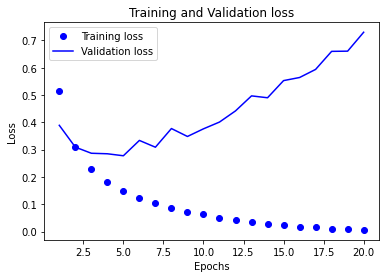

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b',label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

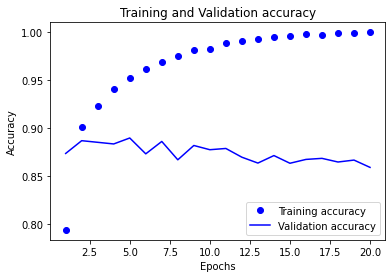

In [20]:
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b',label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [21]:
model.predict(x_test)

array([[3.5704076e-03],
       [9.9999958e-01],
       [3.1527668e-01],
       ...,
       [6.6900253e-04],
       [6.1836243e-03],
       [3.8887602e-01]], dtype=float32)